In [2]:
#acerage and median length of each sentiment category , plot histogram

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('poem_data.csv')

In [3]:
df.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [4]:
#calculate length
df['length']= df['Poem'].apply (lambda x: len(str(x).split()))

In [5]:
stats = df.groupby('Genre')['length'].agg(['mean','median'])
#Group by genre and computed mean and median

print(stats)

                  mean  median
Genre                         
Affection    48.224066    50.0
Death        47.785425    50.0
Environment  44.337302    50.0
Music        46.059761    50.0


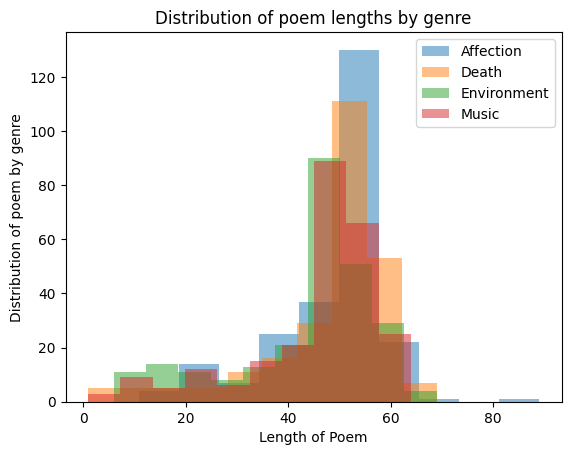

In [6]:
df.groupby('Genre')['length'].plot(kind='hist',alpha=0.5,legend=True)
plt.xlabel('Length of Poem')
plt.ylabel('Distribution of poem by genre')
plt.title('Distribution of poem lengths by genre')
plt.show()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter

#identifying and plotting top 20 most frequent bigrams , classifying into positive and negative

In [8]:
#Split positive and negative classes

pos_texts = df[df['Genre'].isin(['Affection','Music'])]['Poem']
neg_texts = df[df['Genre'].isin(['Death','Environment'])]['Poem']

<Figure size 1000x600 with 0 Axes>

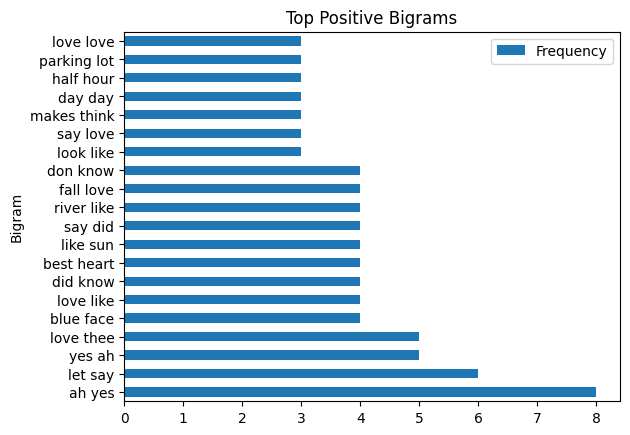

<Figure size 1000x600 with 0 Axes>

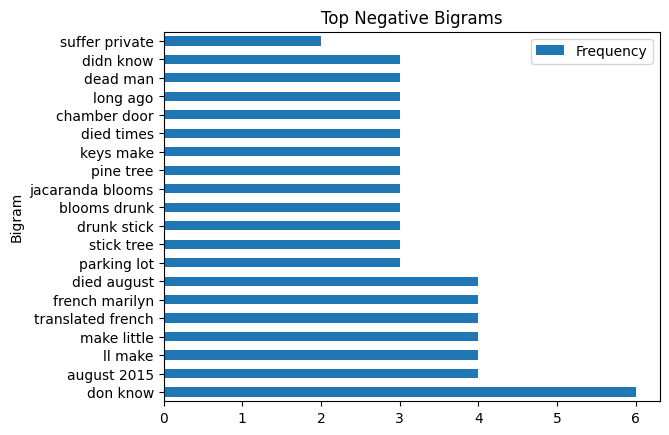

In [9]:
#Function to get top bigrams

def top_20_bigrams(texts,n=20):
  # Fill NaN values with empty strings
  texts = texts.fillna('')
  vec = CountVectorizer(ngram_range=(2,2),stop_words='english').fit(texts)
  bag_of_words = vec.transform(texts)
  sum_of_words = bag_of_words.sum(axis=0)
  word_freq = [(word,sum_of_words[0,idx])for word , idx in vec.vocabulary_.items()]
  return sorted(word_freq, key=lambda x: x[1], reverse=True)[:n]


top_pos = top_20_bigrams(pos_texts)
top_neg = top_20_bigrams(neg_texts)

pos_df = pd.DataFrame(top_pos,columns=['Bigram','Frequency'])
neg_df = pd.DataFrame(top_neg,columns=['Bigram','Frequency'])


plt.figure(figsize=(10,6))
pos_df.sort_values(by='Frequency',ascending=False).plot(x='Bigram',y='Frequency',kind='barh',title='Top Positive Bigrams')
plt.show()

plt.figure(figsize=(10,6))
neg_df.sort_values(by='Frequency',ascending=False).plot(x='Bigram',y='Frequency',kind='barh',title='Top Negative Bigrams')
plt.show()

In [10]:
import re
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')


# --- (i) Basic Cleaning ---
def clean_text(text):
    # Convert non-string inputs to string
    text = str(text)
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove numbers & special chars
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

# Before/After example
print("Before:", df['Poem'].iloc[0])
print("After:", clean_text(df['Poem'].iloc[0]))

# --- (ii) Tokenization + Lemmatization ---
lemmatizer = WordNetLemmatizer()

def tokenize_lemmatize(text):
    tokens = word_tokenize(text)  # tokenization
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

# Apply on 5 random samples
samples = df['Poem'].sample(5, random_state=42)
for i, s in enumerate(samples):
    print(f"\nSample {i+1}:")
    print("Original:", s)
    print("Processed:", tokenize_lemmatize(clean_text(s)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Before: nan
After: nan

Sample 1:
Original: What is it you feel I asked Kurt when you listen toRavel’s String Quartet in F-major, his face was so lit upand I wondered, “the music is unlike the world I liveor think in, it’s from somewhere else, unfamiliar and unknown,not because it is relevant to the familiar and comfortable,but
Processed: ['what', 'is', 'it', 'you', 'feel', 'i', 'asked', 'kurt', 'when', 'you', 'listen', 'toravels', 'string', 'quartet', 'in', 'fmajor', 'his', 'face', 'wa', 'so', 'lit', 'upand', 'i', 'wondered', 'the', 'music', 'is', 'unlike', 'the', 'world', 'i', 'liveor', 'think', 'in', 'it', 'from', 'somewhere', 'else', 'unfamiliar', 'and', 'unknownnot', 'because', 'it', 'is', 'relevant', 'to', 'the', 'familiar', 'and', 'comfortablebut']

Sample 2:
Original: I have been a spendthrift Dropping from lazy fingers Quiet coloured hours, Fluttering away from me Like oak and beech leaves in October.I have lived keenly and wastefully, Like a bush or a sun insect— Lived sensua

             count  average  median
Genre                              
Affection      241   272.78   283.0
Death          244   276.50   293.0
Environment    252   261.45   288.0
Music          250   265.86   286.5


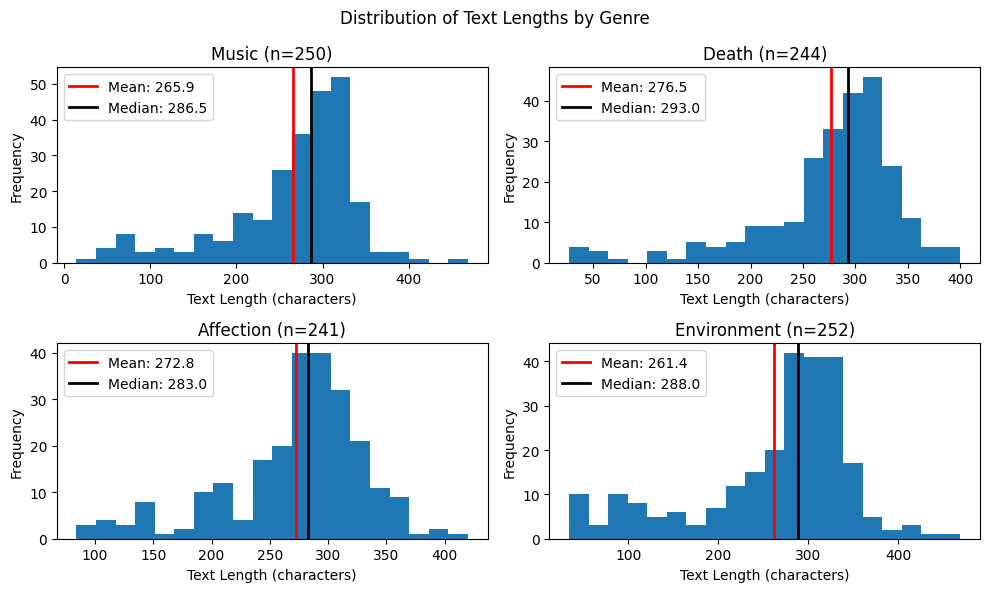

Positive Bi-grams  [(('in', 'the'), 124), (('of', 'the'), 101), (('on', 'the'), 52), (('to', 'the'), 44), (('in', 'a'), 43), (('at', 'the'), 42), (('it', 's'), 40), (('i', 'am'), 39), (('i', 'm'), 38), (('when', 'i'), 33), (('in', 'my'), 33), (('and', 'the'), 33), (('from', 'the'), 31), (('for', 'the'), 28), (('is', 'a'), 26), (('i', 'was'), 25), (('is', 'the'), 24), (('to', 'be'), 24), (('it', 'is'), 24), (('with', 'the'), 24)]
Negative Bi-grams  [(('in', 'the'), 150), (('of', 'the'), 107), (('on', 'the'), 61), (('and', 'the'), 54), (('to', 'the'), 44), (('in', 'a'), 43), (('from', 'the'), 40), (('i', 'have'), 32), (('i', 'am'), 32), (('like', 'a'), 29), (('at', 'the'), 29), (('through', 'the'), 24), (('for', 'the'), 24), (('and', 'i'), 24), (('it', 'is'), 23), (('i', 'm'), 22), (('where', 'the'), 22), (('of', 'a'), 21), (('as', 'a'), 21), (('the', 'night'), 21)]


In [11]:
# Load the data
df = pd.read_csv('poem_data.csv')

# Remove rows with null poems
df = df.dropna(subset=['Poem'])

# Calculate text length for each poem
df['text_length'] = df['Poem'].str.len()

# Calculate statistics by genre
genre_stats = df.groupby('Genre')['text_length'].agg([
    ('count', 'count'),
    ('average', 'mean'),
    ('median', 'median')
]).round(2)

# print
print(genre_stats)




# Create histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Distribution of Text Lengths by Genre')

genres = df['Genre'].unique()

for idx, (ax, genre) in enumerate(zip(axes.flat, genres)):
    genre_data = df[df['Genre'] == genre]['text_length']

    # Create histogram
    n, bins, patches = ax.hist(genre_data, bins=20)

    # Add vertical lines for mean and median
    mean_val = genre_data.mean()
    median_val = genre_data.median()

    ax.axvline(mean_val, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='black', linestyle='-', linewidth=2, label=f'Median: {median_val:.1f}')

    # Labels and title
    ax.set_title(f'{genre} (n={len(genre_data)})')
    ax.set_xlabel('Text Length (characters)')
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()



# Define positive and negative classes based on genre
# Positive: Affection, Music
# Negative: Death, Environment
positive_genres = ['Affection', 'Music']
negative_genres = ['Death', 'Environment']

# Create positive and negative class dataframes
df_positive = df[df['Genre'].isin(positive_genres)]
df_negative = df[df['Genre'].isin(negative_genres)]



def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and extra spaces
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Tokenize
    tokens = text.strip().split()
    return tokens

def get_bigrams(text):
    tokens = preprocess_text(text)
    bigrams = []
    for i in range(len(tokens) - 1):
        bigrams.append((tokens[i], tokens[i + 1]))
    return bigrams

# create bigrams function
def get_top_bigrams(df_class, n=20):
    all_bigrams = []
    for poem in df_class['Poem']:
        if poem:
            all_bigrams.extend(get_bigrams(poem))

    # Count bigrams
    bigram_counts = Counter(all_bigrams)

    # Get top n bigrams
    top_bigrams = bigram_counts.most_common(n)
    return top_bigrams


    # Print Top 20 positive bigrams
positive_bigrams = get_top_bigrams(df_positive, 20)
print("Positive Bi-grams ", positive_bigrams)


# Print Top 20 negative bigrams
negative_bigrams = get_top_bigrams(df_negative, 20)
print("Negative Bi-grams ", negative_bigrams)

In [12]:
##2a

import numpy as np

# Store original data for comparison
df['Original_Poem'] = df['Poem'].copy()

def text_cleaning(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove special characters and punctuation
    # Keep only alphabets and spaces
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Remove extra whitespaces (multiple spaces to single space)
    text = re.sub(r'\s+', ' ', text)

    # Strip leading and trailing spaces
    text = text.strip()
    return text



    # Apply cleaning to all poems
df['Cleaned_Poem'] = df['Poem'].apply(text_cleaning)

# Show 3 random samples
np.random.seed(42)  # For reproducibility
sample_indices = np.random.choice(df.index, 3, replace=False)

for idx, i in enumerate(sample_indices, 1):
    print(f"\n{'='*70}")
    print(f"SAMPLE {idx} - Genre: {df.loc[i, 'Genre']}")
    print(f"{'='*70}")

    original = df.loc[i, 'Original_Poem'][:200]  # Show first 200 chars
    cleaned = df.loc[i, 'Cleaned_Poem'][:200]

    print("\nBEFORE CLEANING:")
    print("-" * 50)
    print(original + ("..." if len(df.loc[i, 'Original_Poem']) > 200 else ""))

    print("\nAFTER CLEANING:")
    print("-" * 50)
    print(cleaned + ("..." if len(df.loc[i, 'Cleaned_Poem']) > 200 else ""))




    #2b


    # function that returns tokenized and lemmatized tokens
def tokenize_and_lemmatize(sentence):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize the sentence
    tokens = word_tokenize(sentence.lower())

    # Lemmatize each token
    lemmatized_tokens = []
    for token in tokens:
        # Lemmatize with appropriate POS tag (noun by default)
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)

    return lemmatized_tokens



    import random
# Set seed for reproducibility
np.random.seed(42)

# Select 5 random samples
sample_indices = np.random.choice(df.index, 5, replace=False)

# Process each sample
results = []
for idx, i in enumerate(sample_indices, 1):
    # Get the poem text (first 200 characters for display)
    poem_text = df.loc[i, 'Poem']
    genre = df.loc[i, 'Genre']
    result = tokenize_and_lemmatize(poem_text)
    print("=="*50)
    print(f"ORIGINAL : {poem_text}")
    print(" ")
    print(f"PROCESSED : {result}")
    print("=="*50)


SAMPLE 1 - Genre: Death

BEFORE CLEANING:
--------------------------------------------------
He saw her from the bottom of the stairs Before she saw him.She was starting down, Looking back over her shoulder at some fear. She took a doubtful step and then undid it To raise herself and look aga...

AFTER CLEANING:
--------------------------------------------------
he saw her from the bottom of the stairs before she saw him she was starting down looking back over her shoulder at some fear she took a doubtful step and then undid it to raise herself and look again...

SAMPLE 2 - Genre: Music

BEFORE CLEANING:
--------------------------------------------------
Onliest man who lay hands on me. Pointer finger pad between my eyes. Pinky knuckle cool on cheekbone. God of precision, blade at my throat,for a half hour, you love me this way. Together we discover w...

AFTER CLEANING:
--------------------------------------------------
onliest man who lay hands on me pointer finger pad between my ey

In [18]:
import re
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from gensim.models import Word2Vec

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('stopwords', quiet=True)


# Count Nouns
def count_nouns(texts):
    noun_count = 0
    noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']  # Noun POS tags

    for text in texts:
        # Tokenize and POS tag
        tokens = word_tokenize(text)
        tagged = nltk.pos_tag(tokens)

        # Count nouns
        for word, tag in tagged:
            if tag in noun_tags:
                noun_count += 1

    return noun_count



# get all target classes in an array
targets = df['Genre'].unique()


for target in targets:
    texts = df[df['Genre'] == target]['Poem']
    noun_cnts = count_nouns(texts)
    print(f' Noun count for {target} is {noun_cnts}')


#2c ii)
# drop any blank rows
df = df.dropna(subset=['Poem'])

# Tokenize poems
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    return [token for token in tokens if token not in stop_words and token.isalpha()]

# Create corpus of tokenized poems
corpus = [preprocess_text(poem) for poem in df['Poem']]

embedding_dim = 100

# Train Word2Vec model
word2vec = Word2Vec(sentences=corpus,
                 min_count=5,
                 window=5,
                 vector_size=embedding_dim,
                 sg=0,           # Use CBOW
                 seed=42)


# Find similar words to "soul"
print("\n5 most similar words to 'soul':")
try:
    similar_to_soul = word2vec.wv.most_similar('soul', topn=5)
    for word, similarity in similar_to_soul:
        print(f"  {word}: {similarity:.4f}")
except KeyError:
    print("  'soul' not in vocabulary (appears less than 5 times)")





# Find similar words to "light"
print("\n5 most similar words to 'light':")
try:
    similar_to_light = word2vec.wv.most_similar('light', topn=5)
    for word, similarity in similar_to_light:
        print(f"  {word}: {similarity:.4f}")
except KeyError:
    print("  'light' not in vocabulary (appears less than 5 times)")

 Noun count for Music is 3563
 Noun count for Death is 3504
 Noun count for Affection is 3482
 Noun count for Environment is 3664

5 most similar words to 'soul':
  night: 0.9846
  old: 0.9834
  could: 0.9830
  things: 0.9829
  one: 0.9826

5 most similar words to 'light':
  like: 0.9965
  one: 0.9962
  still: 0.9958
  go: 0.9958
  sun: 0.9956


In [14]:
!pip install gensim

In [21]:
#Section C

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Applying the cleaning text
df['Cleaned_Poem'] = df['Poem'].apply(text_cleaning)

# Prepare data
X = df['Cleaned_Poem']
y = df['Genre']


# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
print("Vectorizing text using TF-IDF...")
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Naive Bayes classifier
print("Training Naive Bayes classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")




#Preprocessing for deep learning

# Tokenize text using Keras Tokenizer
tokenizer = Tokenizer()

# Convert text to integer sequences
tokenizer.fit_on_texts(df['Cleaned_Poem'])
word_index = tokenizer.word_index

# Convert text to integer sequences
sequences = tokenizer.texts_to_sequences(df['Cleaned_Poem'])

# Convert to padded sequences
max_len = max(len(seq) for seq in sequences)

# Pad all sequences to the same length (max_len)
# 'post' padding adds zeros at the end of the sequence
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Label encode the sentiments
le = LabelEncoder()
y_encoded = le.fit_transform(df['Genre'])
one_hot_labels = to_categorical(y_encoded)

Vectorizing text using TF-IDF...
Training Naive Bayes classifier...

Accuracy: 0.3737
F1-Score (weighted): 0.3688


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │       918,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 918,500 (3.50 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 918,500 (3.50 MB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │       918,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 918,500 (3.50 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 918,500 (3.50 MB)

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.2647 - loss: 1.3868 - val_accuracy: 0.2785 - val_loss: 1.3842
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.2887 - loss: 1.3844 - val_accuracy: 0.2278 - val_loss: 1.3937
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.2555 - loss: 1.3850 - val_accuracy: 0.2278 - val_loss: 1.3933
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.2815 - loss: 1.3852 - val_accuracy: 0.2911 - val_loss: 1.3732
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.2978 - loss: 1.3744 - val_accuracy: 0.2405 - val_loss: 1.4009


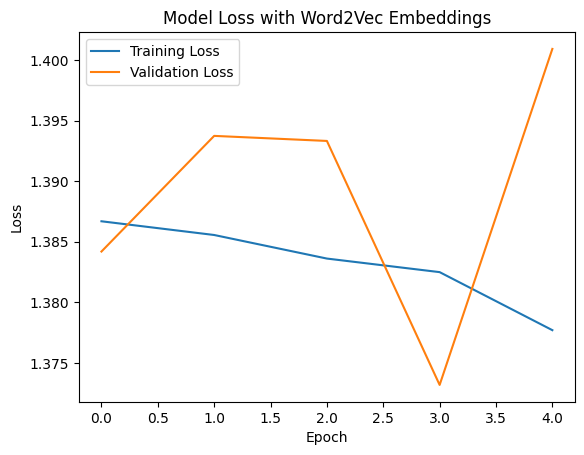

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2328 - loss: 1.4048

Test Loss: 1.4040
Test Accuracy: 0.2222


In [24]:
#Build a vanilla LSTM

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt


# target classes
num_classes = one_hot_labels.shape[1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)


embedding_dim = 100

# Create embedding matrix for Keras Embedding layer
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in word2vec.wv:
        embedding_matrix[i] = word2vec.wv[word]

# LSTM Model
model = Sequential()

# Embedding layer using pretrained Skip-Gram vectors
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_dim, weights=[embedding_matrix],
                    input_length=max_len, trainable=False))

# LSTM layer to capture sequential patterns
model.add(LSTM(128))

# Output layer with softmax for 5 sentiment classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()



# Model Summary
model.summary()



# Train the model
history = model.fit(X_train, y_train,
                   batch_size=32,
                   epochs=5,
                   validation_split=0.1,
                   verbose=1)



# Plot loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Word2Vec Embeddings')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()




# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")